### Linear Regression(SGD)



---
Importing the required packages


---



In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns
import random



---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [45]:
housing_data = california_housing.fetch_california_housing()

In [46]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [47]:
df = df[df.Target < 5]

In [48]:
X = df.MedInc
y = df.Target

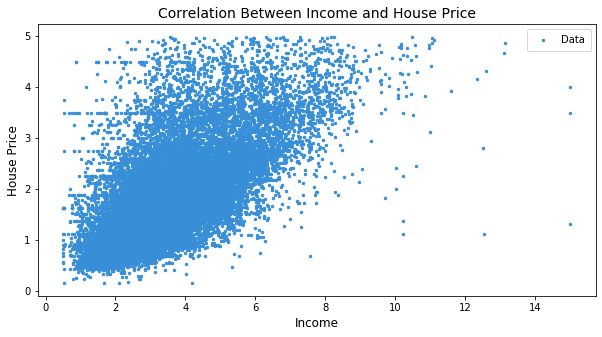

In [49]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [53]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
    m,b = 0.1,0.1
    mse = []
    for i in range(epochs):
        l_index = np.arange(0,len(X))
        index = random.choice(l_index)
        X = np.array(X)
        y = np.array(y)
        X_sample = X[index]
        y_sample = y[index]
        N = batch_size
        f = y_sample - (m*X_sample + b)
        #Updating parameters m and b
        m -= lr * (-2 * np.sum(np.dot(X_sample,f)) / N)
        b -= lr * (-2 * np.sum(f) / N)
        mse.append(mean_squared_error(y, m*X+b))        
    return m, b, mse

In [54]:
m, b,  mse = SGD(X, y, lr=0.02, epochs=100, batch_size=3)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

MSE: 0.557872707082504


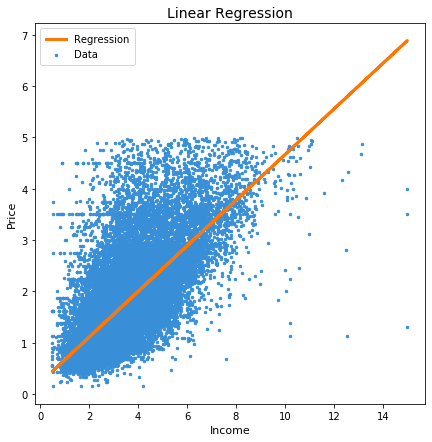

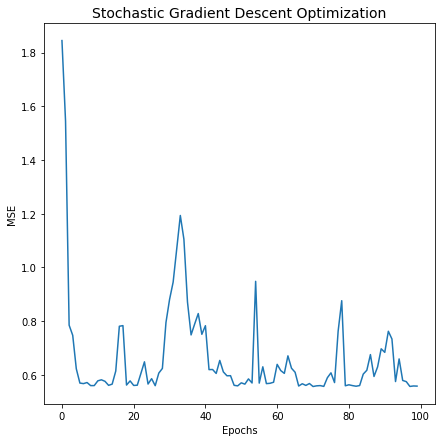

In [55]:
predy = m*X + b

print("MSE:",mean_squared_error(y, predy))

plt.figure(figsize=(7,7))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, predy, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend( loc=0, fontsize=10, borderpad=.6)
plt.show()


epochs = 100
plt.figure(figsize=(7,7))
plt.plot(range(epochs), mse)
plt.title('Stochastic Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

## Support Vector Machines (SVM)

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [57]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
    x, y = point
    if 0.5*x - y + 0.25 > 0:
        data[i].append(-1)
    else:
        data[i].append(1)



---


**Visualizing the above data**


---



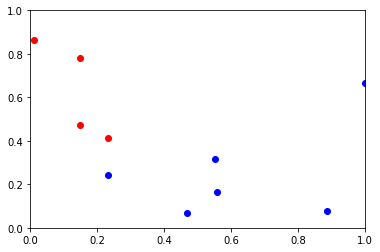

In [58]:
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.xlim(0,1)
    plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



### Pegasos Algorithm

In [59]:
def svm_function(x, y, epoch, l_rate):
    w = np.zeros(len(X[0]))
    eta = 1
    for epoch in range(1,epochs):
        eta = 1/(l_rate*epoch)
        for i, x in enumerate(X):
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * Y[i]) - (l_rate* w))
            else:
                w = w - eta * (l_rate* w)
    return w
    
    return w



---


**Run SVM Classifier**


---



In [60]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 1)

# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



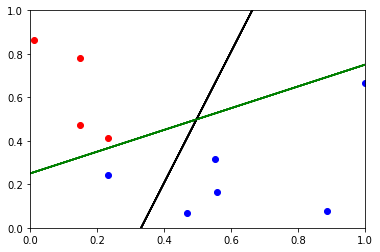

In [65]:
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    x1 = np.linspace(-5,5,100)
    y1 = (-w[0]*x1-w[1])/w[1]
    plt.plot(x1, y1, c='black', label="SVM boundary")
    x2 = np.linspace(-5,5,100)
    y2 = 0.5*x2 + 0.25
    plt.plot(x2, y2, c='green', label="Actual")
    plt.xlim(0,1)
    plt.ylim(0,1)